# Fisher's Linear Discriminant

Contrary to the least squares' approach in solving the classfication problem, the _projection_ way of solving the problem is by reducing the dimension of the input vector vector ${\bf x} \in \mathbb{R}^n$ onto $\mathbb{R}$ via the weight vector ${\bf w} \in \mathbb{R}^n$

In its simplest form,
> we look for ${\bf w}$ such that the separation of the projected class means is as large as possible.

Denoting for a class $C_k$, its mean vector by

$$
    {\bf m}_k = \frac{1}{N_k}\sum_{n \in C_k} x_n
$$

In order to maximize the separation between classes, we consider the following optimization problem
$$
\begin{align}
    \text{max } \quad & {\bf w}^T ({\bf m}_2 - {\bf m}_1) \\
    \text{s.t. } \quad & {\bf w}^T{\bf w} = 1
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, multivariate_normal

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"]  = (12, 5)

In order to understand the result that the optimization problem above yields, we will consider two classes coming from a multivariate normal each with parameters as follows:

In [3]:
cov1 = np.array([
    [1, 0.6],
    [0.6, 1]
])
mu1 = (0, 3)

cov2 = np.array([
    [1, 0.7],
    [0.7, 1]
])
mu2 = (5, 2)

Next, we sample 100 observation from each distribution and compute the class mean.

In [4]:
seed(314)
# The training dataset
X1 = multivariate_normal(mu1, cov1, 100)
X2 = multivariate_normal(mu2, cov2, 100)
# The mean vectors
m1 = X1.mean(axis=0)
m2 = X2.mean(axis=0)

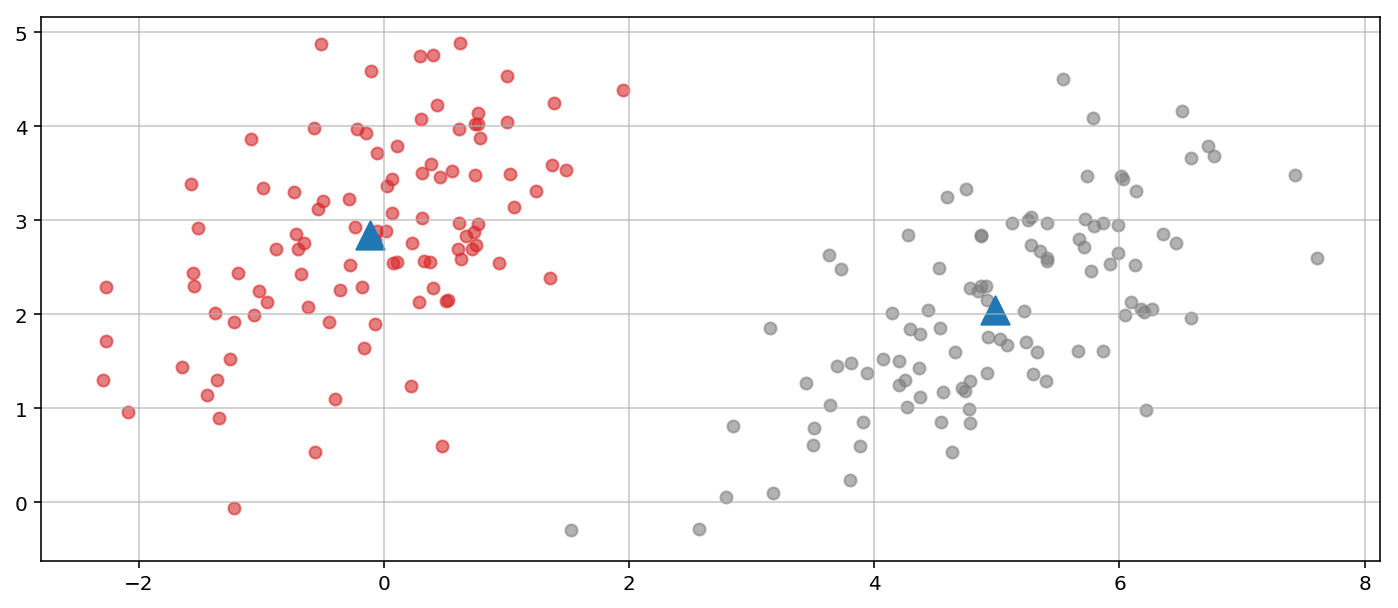

In [29]:
plt.scatter(*X1.T, alpha=0.6, c="tab:red")
plt.scatter(*X2.T, alpha=0.6, c="tab:gray")
plt.scatter(*m1, marker="^", s=200, c="tab:blue")
plt.scatter(*m2, marker="^", s=200, c="tab:blue")
plt.grid(alpha=0.7)

For the optimization problem above, the weight vector ${\bf w}$ that maximizes the separation of mean classes subject to a unit norm vector is given by

$$
    {\bf w}^* = \frac{-2 ({\bf m}_2 - {\bf m}_1)}{\left[({\bf m}_2 - {\bf m}_1)^T({\bf m}_2 - {\bf m}_1)\right]^{1/2}}
$$

In [16]:
what = -2 * (m2 - m1) / np.sqrt((m2 - m1).T @ (m2 - m1))
what = what[:, np.newaxis]
what.shape

(2, 1)

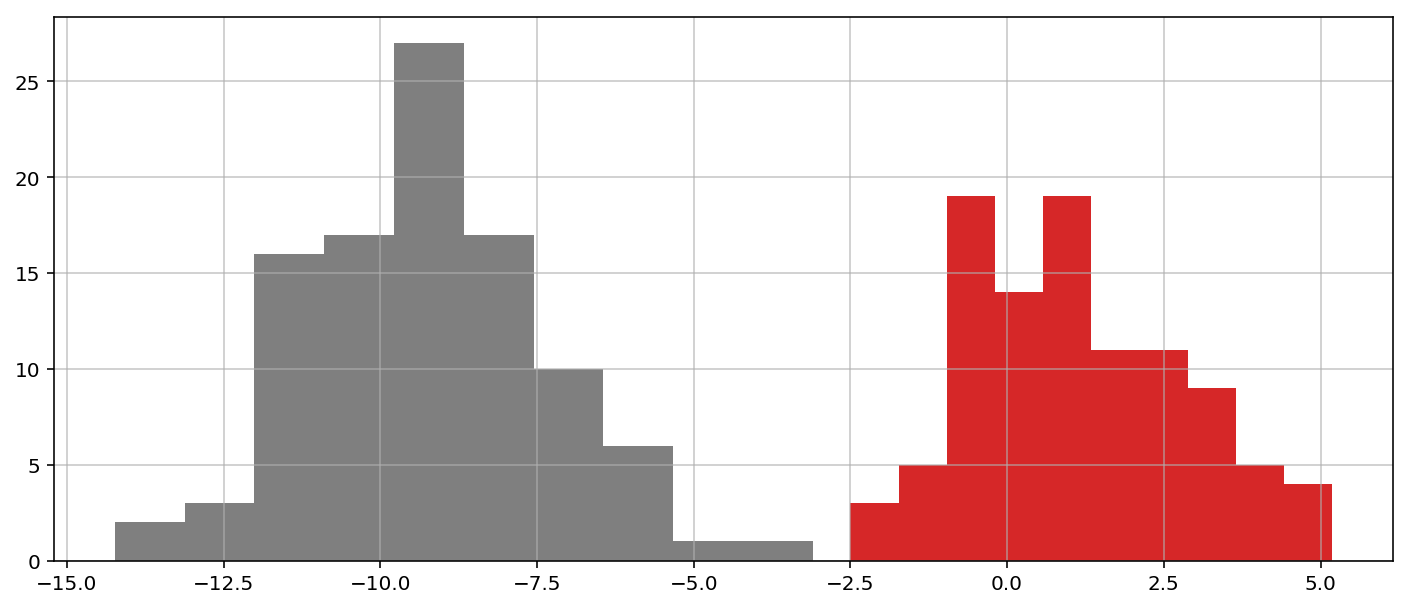

In [31]:
plt.hist(X1 @ what, color="tab:red")
plt.hist(X2 @ what, color="tab:gray")
plt.grid(alpha=0.7);